## Systems of Simultaneous Equations

You probably remember being asked to solve systems like: $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ x_1 - 3x_2 &= & 15\end{array}\right.$ in previous math courses. As a reminder, the solution to such a system in two variables corresponds to a point of intersection between the two straight lines. See the image below.

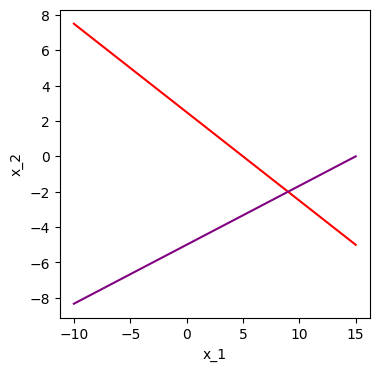

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt

x1_vals = np.linspace(-10, 15, 200)
x2_vals1 = (10 - 2*x1_vals)/4
x2_vals2 = (15 - x1_vals)/(-3)

plt.figure(figsize = (4, 4))
plt.plot(x1_vals, x2_vals1, color = "red")
plt.plot(x1_vals, x2_vals2, color = "purple")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

We can see that the system $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ x_1 - 3x_2 &= & 15\end{array}\right.$ has a single solution from the plot. You may also remember that systems can also have no solutions or infinitely many solutions. For example, the system $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ 4x_1 +8x_2 &= & 15\end{array}\right.$ has no solutions, and the system $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ -4x_1 - 8x_2 &= & -20\end{array}\right.$ has infinitely many solutions, as can be seen in the middle and right plot respectively below.

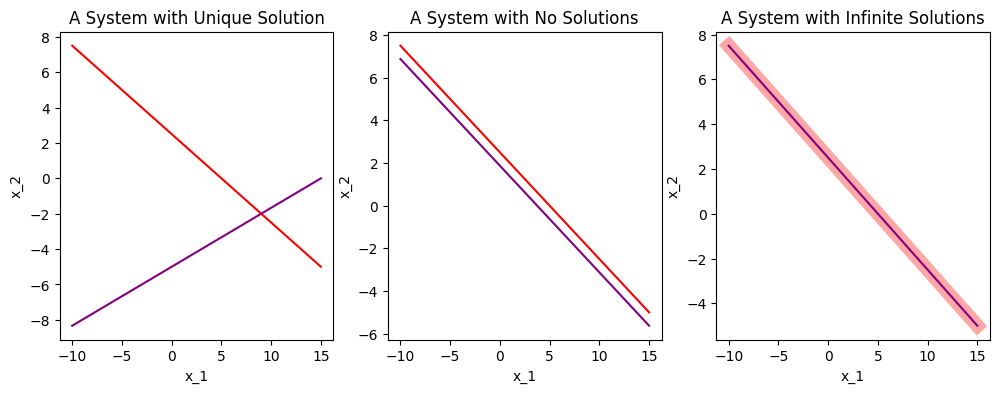

In [ ]:
#@title
x1_vals = np.linspace(-10, 15, 200)
sys1_x2_vals1 = (10 - 2*x1_vals)/4
sys1_x2_vals2 = (15 - x1_vals)/(-3)

sys2_x2_vals1 = (10 - 2*x1_vals)/4
sys2_x2_vals2 = (15 - 4*x1_vals)/8

sys3_x2_vals1 = (10 - 2*x1_vals)/4
sys3_x2_vals2 = (-20 + 4*x1_vals)/(-8)

plt.figure(figsize = (12, 4))
plt.subplot(1, 3, 1)
plt.plot(x1_vals, sys1_x2_vals1, color = "red")
plt.plot(x1_vals, sys1_x2_vals2, color = "purple")
plt.title("A System with Unique Solution")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.subplot(1, 3, 2)
plt.plot(x1_vals, sys2_x2_vals1, color = "red")
plt.plot(x1_vals, sys2_x2_vals2, color = "purple")
plt.title("A System with No Solutions")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.subplot(1, 3, 3)
plt.plot(x1_vals, sys3_x2_vals1, color = "red", linewidth = 10, alpha = 0.35)
plt.plot(x1_vals, sys3_x2_vals2, color = "purple")
plt.title("A System with Infinite Solutions")
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.show()

In the rightmost plot above, one of the lines is made artificially thick to show that both lines agree at all $\left(x_1, x_2\right)$ satisfying either equation.

## Solving Systems: Augmented Coefficient Matrices

You may remember from Linear Algebra that we can efficiently solve linear systems by reducing an *augmented coefficient matrix*. As a reminder, a system like the one we began with $\left\{\begin{array}{rcl} 2x_1 + 4x_2 &= & 10\\ x_1 - 3x_2 &= & 15\end{array}\right.$ can be described via matrix multiplication as

$$\left[\begin{array}{cc} 2 & 4\\ 1 & - 3\end{array}\right]\cdot\left[\begin{array}{c} x_1\\ x_2\end{array}\right] = \left[\begin{array}{c}10\\ 15\end{array}\right]$$

The corresponding *augmented coefficient matrix* is of the form:

$$\left[\begin{array}{cc|c} 2 & 4 & 10\\ 1 & -3 & 15\end{array}\right]$$

To solve the system by reducing the augmented coefficient matrix, we might take the following steps:

\begin{align*} \left[\begin{array}{cc|c} 2 & 4 & 10\\ 1 & -3 & 15\end{array}\right] &\stackrel{\text{R1 ÷ 2}}{\to} \left[\begin{array}{cc|c} 1 & 2 & 5\\ 1 & -3 & 15\end{array}\right]\\
&\stackrel{\text{R2 = R2 - R1}}{\to} \left[\begin{array}{cc|c} 1 & 2 & 5\\ 0 & -5 & 10\end{array}\right]\\
&\stackrel{\text{R2 ÷ -5}}{\to} \left[\begin{array}{cc|c} 1 & 2 & 5\\ 0 & 1 & -2\end{array}\right]\\
&\stackrel{\text{R1 = R1 - R2}}{\to}\left[\begin{array}{cc|c} 1 & 0 & 9\\ 0 & 1 & -2\end{array}\right]
\end{align*}

That is, $x_1 = 9$ and $x_2 = -2$ is the solution to the system. There were indeed other ways to approach solving this. For example, after the first step, we arrived at the "coefficient side" of our augmented matrix being an *upper triangular matrix* (a matrix with all $0$'s below the main diagonal). From here, we could have simply solved for $x_2$ and used *back substitution* to find the value of $x_1$. Let's see that below:

$$\begin{align*} \left[\begin{array}{cc|c} 1 & 2 & 5\\ 0 & -5 & 10\end{array}\right] &\implies -5x_2 = 10\\
&\implies x_2 = -2
\end{align*}$$

Since $x_2 = -2$ and $x_2 + 2x_2 = 5$, we know 

$$\begin{align*}x_1 + 2\left(-2\right) &= 5\\
\implies x_1 - 4 &= 5\\
\implies x_1 &= 9\end{align*}$$

We arrived at the same solution, $x_1 = -2$ and $x_2 = 9$, but we didn't need to fully row reduce to obtain it. We avoided a handful of row reduction operations in exchange for some manageable algebra. If we were dealing with a larger system, the exchange would be even more beneficial. For example, imagine if we had a hundred equations in a hundred unknowns!

## Methods of Solutions

In general, there are two classes of method for solving linear systems -- *direct* and *iterative*. Both of the methods identified above are direct methods, transforming the original equations into equivalent versions which are more easily solved. The following *elementary operations* can be used without changing the solution to a system (but they may change the determinant ($|A|$)-- more on why this matters in later notebooks).

+ Exchange two rows of the augmented coefficient matrix (changes the sign of $|A|$)
+ Multiply a row of the augmented coefficient matrix by a non-zero constant (multiplies $|A|$ by the same constant)
+ Multiply a row by a non-zero constant and then subtract it from another row (leaves $|A|$ unchanged)


## Special Matrix Forms

We can exploit special matrix forms to solve linear systems. For example, the first approach we used, where we fully reduced the augmented coefficient matrix to obtain the identity matrix on one side is called *Gauss-Jordan Elimination*. We list it, and two other useful reduced forms for the system $A\vec{x} = \vec{b}$ below:

+ $I\vec{x} = \vec{c}$, where $I$ is the $n\times n$ identity matrix (Gauss-Jordan Elimination)
+ $U\vec{x} = \vec{c}$, where $U$ is an *upper-triangular* matrix (Gaussian Elimination)
+ $LU\vec{x} = \vec{b}$, where $L$ isa *lower-triangular* matrix and $U$ is an *upper-triangular* matrix (LU decomposition)

In *Gauss-Jordan elimination*, we have the solution to the system just by reading the resulting augmented coefficient matrix. In *Gaussian elimination*, we can obtain the solution to the system by using backward substitution -- avoiding several row reduction steps in favor of a little algebra. In *LU decomposition*, we can obtain the solution to the system by first using backward substitution and then forward substitution.

## Closing

We'll spend the next few weeks focused on studying (implementing and analyzing) algorithms for solving linear systems. The goal here isn't simply to solve tiny $2\times 2$ systems, but to solve enormous systems efficiently and accurately. We know from our earlier discussion on binary and floating point numbers that there will be some questions around how much we can trust the solutions identified by our algorithms -- we'll need to address those questions head-on if we are to trust our ability to numerically solve these large systems with computing.